# EDA

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv('application_train.csv')

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def preprocess(data):
    data['CODE_GENDER'] = data['CODE_GENDER'].replace('XNA', 'F')
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
    data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
    data['DAYS_BIRTH'] = data['DAYS_BIRTH'].abs()
    data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')
    data['ORGANIZATION_TYPE'] = data['ORGANIZATION_TYPE'].replace('XNA', np.nan)
    
    return data

In [5]:
data = preprocess(data)

### Checking target variable balance

In [4]:
data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

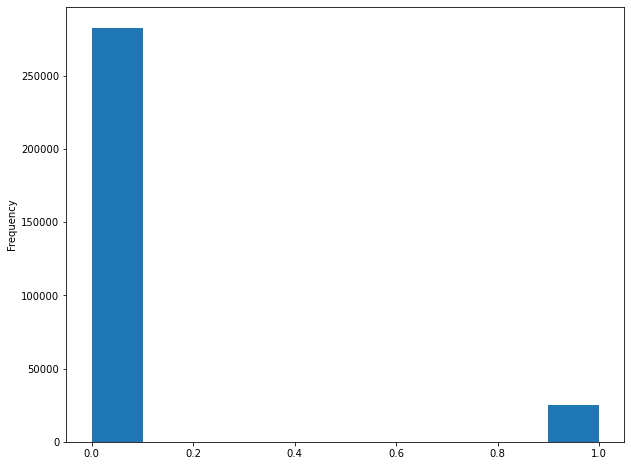

In [43]:
plt.figure(figsize = (10, 8))
data['TARGET'].astype(int).plot.hist();

In [17]:
data["TARGET"].unique()

array([1, 0], dtype=int64)

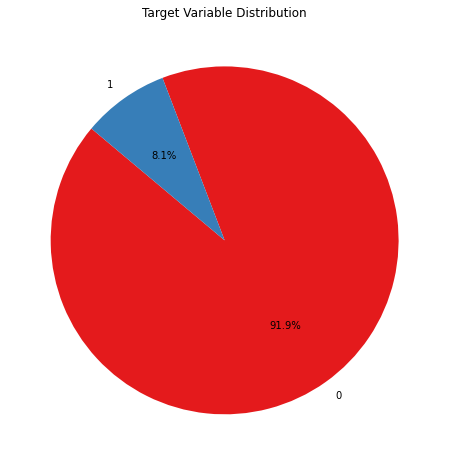

In [63]:
plt.figure(figsize = (10, 8))
plt.pie([282686,24825], labels=[0,1], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.title('Target Variable Distribution')
plt.show();

In [23]:
paid_per = (data['TARGET'].value_counts()[0]/len(data))*100
unpaid_per = (data['TARGET'].value_counts()[1]/len(data))*100
print("Percentage of repaid on time loans: ",paid_per,"%")
print("Percentage of not repaid on time loans: ",unpaid_per,"%")

Percentage of repaid on time loans:  91.92711805431351 %
Percentage of not repaid on time loans:  8.072881945686495 %


## Assessing Categorical Features

In [16]:
# Number of unique values for each categorical variable
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Loan Type 

In [39]:
data['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

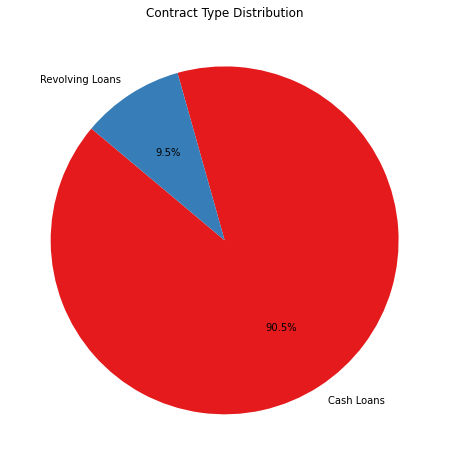

In [40]:
plt.figure(figsize = (10, 8))
plt.pie([278232,29279], labels=['Cash Loans', 'Revolving Loans'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.title('Contract Type Distribution')
plt.show();

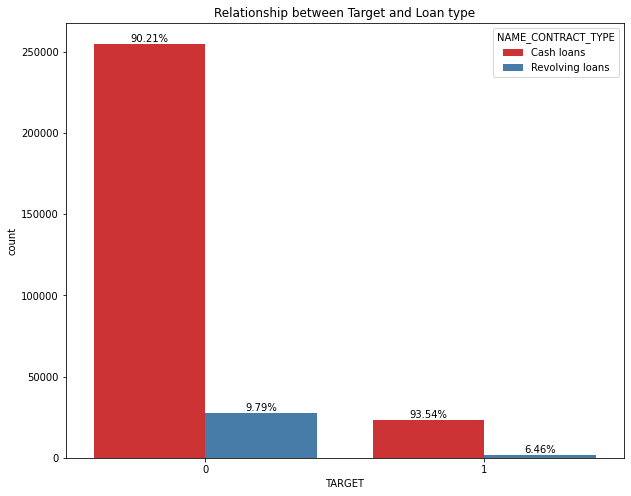

In [99]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='NAME_CONTRACT_TYPE', palette='Set1')
plt.title('Relationship between Target and Loan type');
target = [0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Gender

In [17]:
data['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

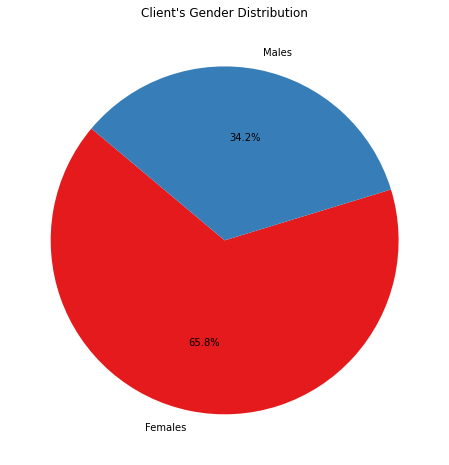

In [5]:
plt.figure(figsize = (10, 8))
plt.pie([202448,105059], labels=['Females', 'Males'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.title("Client's Gender Distribution")
plt.show();

In [7]:
# We only have 4 null values in the gender so let's just replace it with the majority value
data['CODE_GENDER'] = data['CODE_GENDER'].replace('XNA', 'F')

In [98]:
f_per = (data['CODE_GENDER'].value_counts()[0]/len(data))*100
m_per = (data['CODE_GENDER'].value_counts()[1]/len(data))*100
print("Percentage of female clients: ",f_per,"%")
print("Percentage of male clients: ",m_per,"%")

Percentage of female clients:  65.83569368250241 %
Percentage of male clients:  34.164306317497584 %


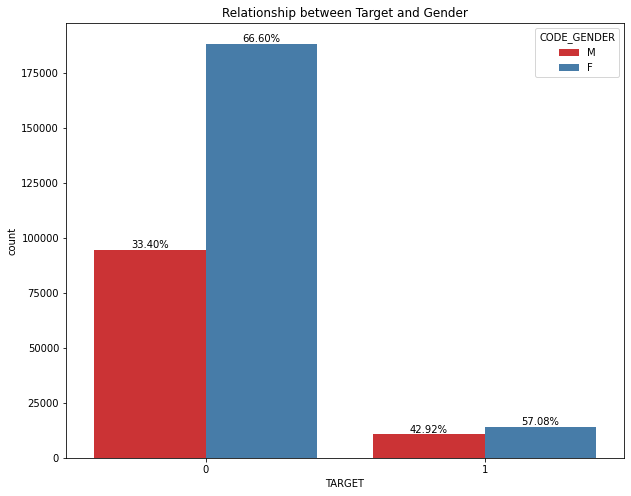

In [8]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='CODE_GENDER', palette='Set1')
plt.title('Relationship between Target and Gender');
target = [0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Owning a Car?

In [51]:
data["FLAG_OWN_CAR"].value_counts(dropna=False)

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

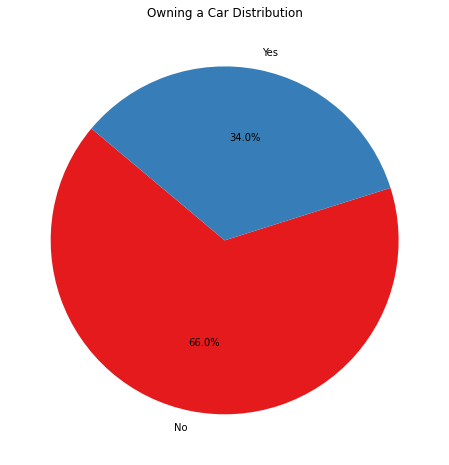

In [9]:
plt.figure(figsize = (10, 8))
plt.pie([202924,104587], labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.title("Owning a Car Distribution")
plt.show();

In [55]:
n_car = (data['FLAG_OWN_CAR'].value_counts()[0]/len(data))*100
y_car = (data['FLAG_OWN_CAR'].value_counts()[1]/len(data))*100
print("Percentage of clients who doesn't own a car: ",n_car,"%")
print("Percentage of clients who own a car: ",y_car,"%")

Percentage of clients who doesn't own a car:  65.98918412674668 %
Percentage of clients who own a car:  34.010815873253314 %


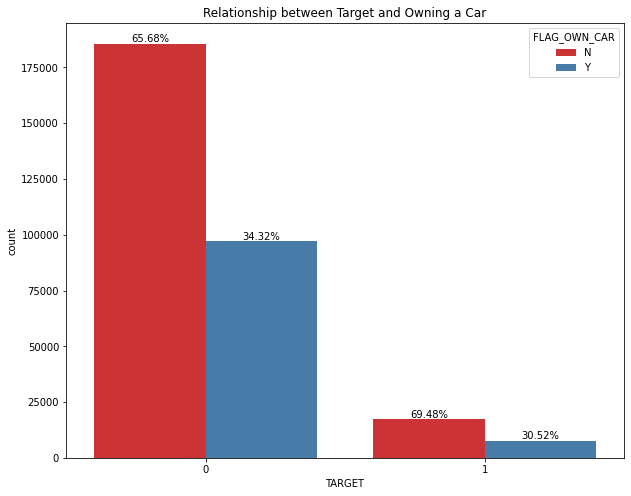

In [10]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='FLAG_OWN_CAR', palette='Set1')
plt.title('Relationship between Target and Owning a Car')
target = [0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Owning a Realty?

In [42]:
data["FLAG_OWN_REALTY"].value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

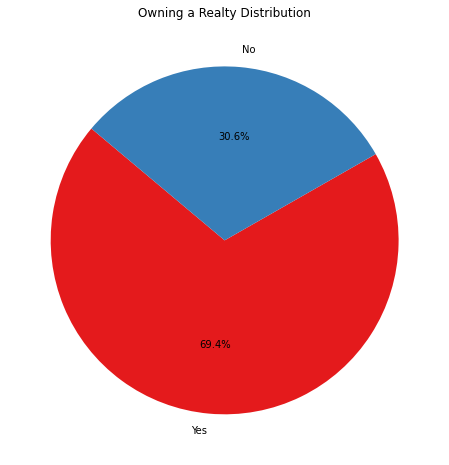

In [11]:
plt.figure(figsize = (10, 8))
plt.pie([213312,94199], labels=['Yes', 'No'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'))
plt.title("Owning a Realty Distribution")
plt.show();

In [74]:
n_realty = (data['FLAG_OWN_REALTY'].value_counts()[0]/len(data))*100
y_realty = (data['FLAG_OWN_REALTY'].value_counts()[1]/len(data))*100
print("Percentage of clients who doesn't own a realty: ",n_realty,"%")
print("Percentage of clients who own a realty: ",y_realty,"%")

Percentage of clients who doesn't own a realty:  69.3672746665973 %
Percentage of clients who own a realty:  30.632725333402703 %


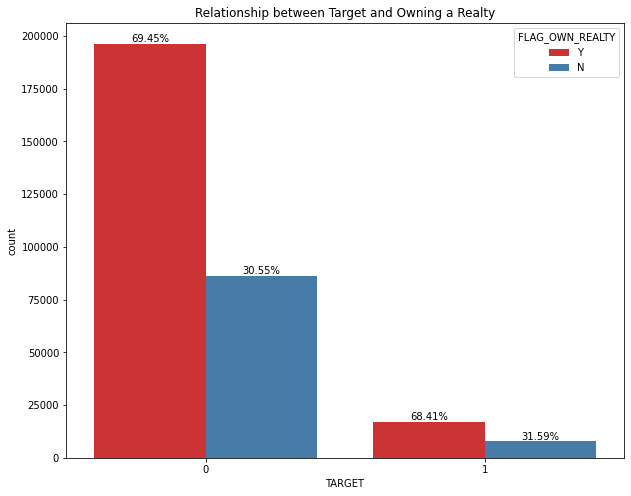

In [12]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='FLAG_OWN_REALTY', palette='Set1')
plt.title('Relationship between Target and Owning a Realty')
target = [0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Got company?

In [100]:
data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

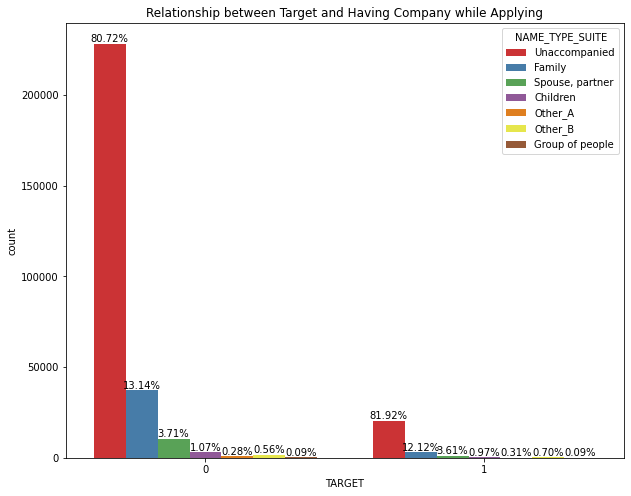

In [16]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='NAME_TYPE_SUITE', palette='Set1')
plt.title('Relationship between Target and Having Company while Applying')
target = [0,1,0,1,0,1,0,1,0,1,0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Income Type

In [75]:
data['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

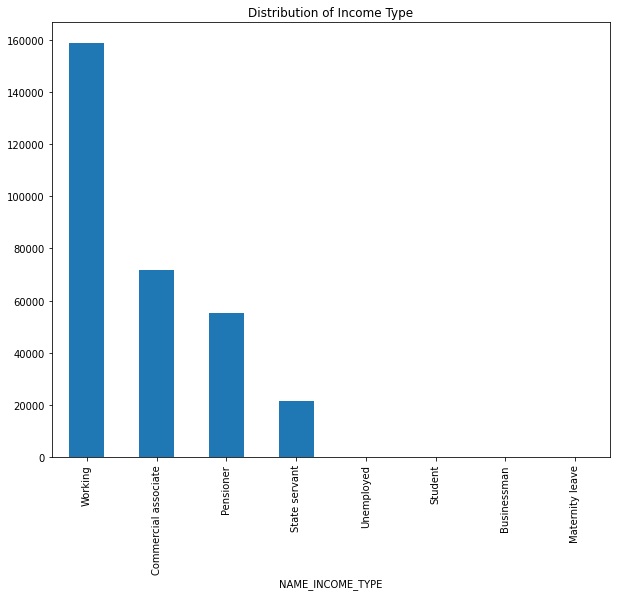

In [82]:
plt.figure(figsize = (10, 8))
data['NAME_INCOME_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Income Type');

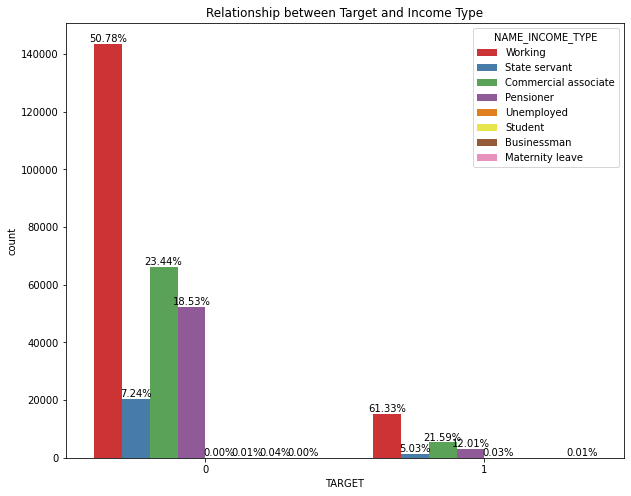

In [17]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='NAME_INCOME_TYPE', palette='Set1')
plt.title('Relationship between Target and Income Type');
target = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Education Type

In [103]:
data['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

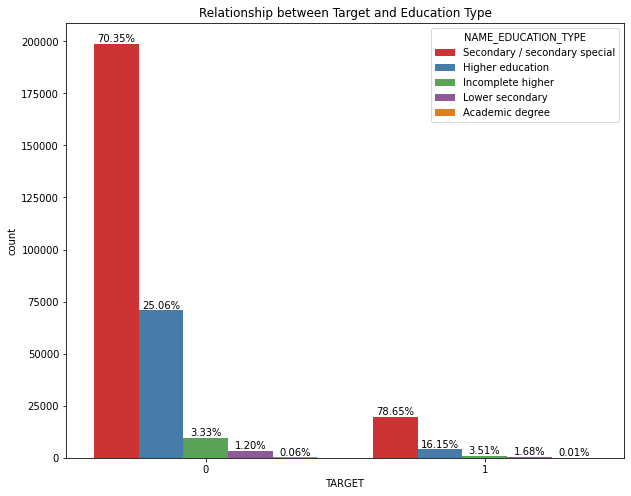

In [15]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='NAME_EDUCATION_TYPE', palette='Set1')
plt.title('Relationship between Target and Education Type');
target = [0,1,0,1,0,1,0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Family Status

In [106]:
data['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [109]:
# Replacing the unknown with the majority value
data['NAME_FAMILY_STATUS'] = data['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

In [20]:
data['NAME_FAMILY_STATUS'].value_counts(dropna=False)

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

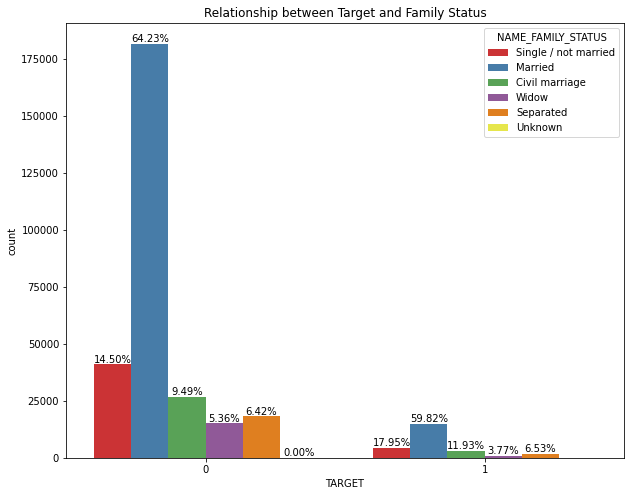

In [19]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='NAME_FAMILY_STATUS', palette='Set1')
plt.title('Relationship between Target and Family Status');

target = [0,1,0,1,0,1,0,1,0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Housing Type

In [113]:
data['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

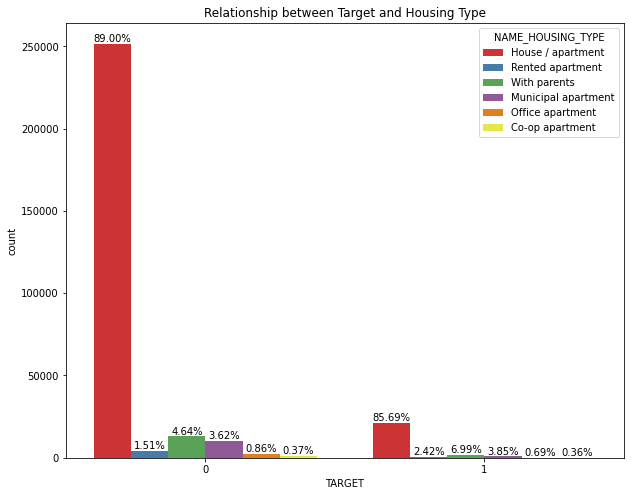

In [22]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='NAME_HOUSING_TYPE', palette='Set1')
plt.title('Relationship between Target and Housing Type');
target = [0,1,0,1,0,1,0,1,0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Client's Occupation

In [83]:
data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

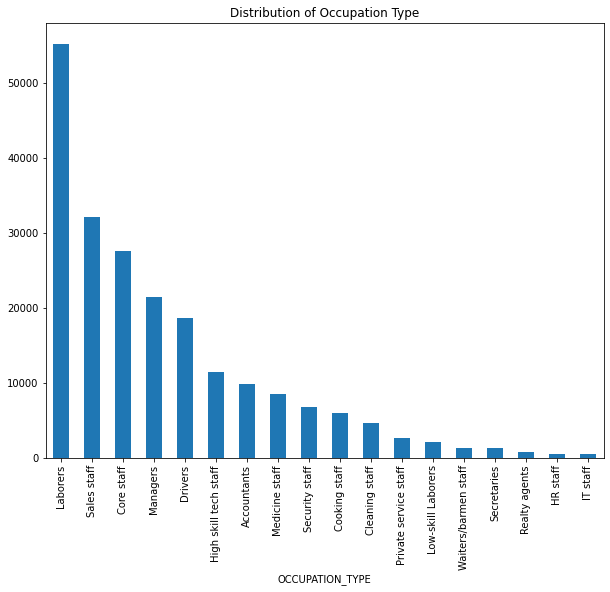

In [87]:
plt.figure(figsize = (10, 8))
data['OCCUPATION_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Occupation Type');

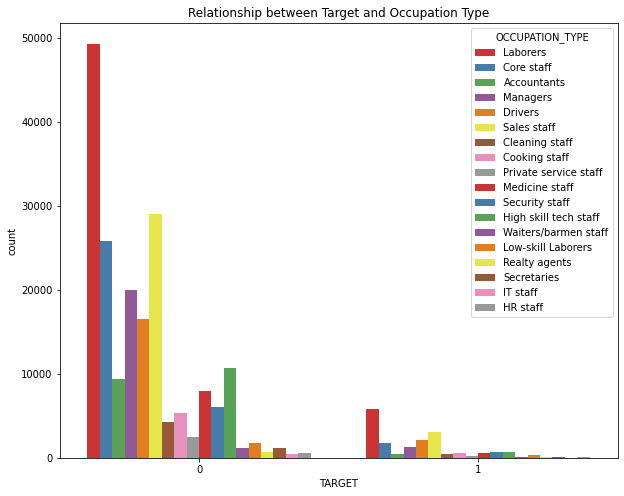

In [88]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='OCCUPATION_TYPE', palette='Set1')
plt.title('Relationship between Target and Occupation Type');

In [89]:
# Group the data by OCCUPATION_TYPE and TARGET, then count the occurrences
occupation_counts = data.groupby(['OCCUPATION_TYPE', 'TARGET']).size().unstack(fill_value=0)

In [90]:
occupation_counts

TARGET,0,1
OCCUPATION_TYPE,,
Accountants,9339,474
Cleaning staff,4206,447
Cooking staff,5325,621
Core staff,25832,1738
Drivers,16496,2107
HR staff,527,36
High skill tech staff,10679,701
IT staff,492,34
Laborers,49348,5838


In [91]:
# Reset the index and rename the columns
occupation_counts = occupation_counts.reset_index()
occupation_counts.columns = ['OCCUPATION_TYPE', 'TARGET_0', 'TARGET_1']

In [92]:
occupation_counts

,OCCUPATION_TYPE,TARGET_0,TARGET_1
0,Accountants,9339,474
1,Cleaning staff,4206,447
2,Cooking staff,5325,621
3,Core staff,25832,1738
4,Drivers,16496,2107
5,HR staff,527,36
6,High skill tech staff,10679,701
7,IT staff,492,34
8,Laborers,49348,5838
9,Low-skill Laborers,1734,359


In [93]:
total_occupations = occupation_counts['TARGET_0'] + occupation_counts['TARGET_1']
occupation_counts['0 Percentage'] = (occupation_counts['TARGET_0'] / total_occupations) * 100
occupation_counts['1 Percentage'] = (occupation_counts['TARGET_1'] / total_occupations) * 100

In [94]:
occupation_counts

,OCCUPATION_TYPE,TARGET_0,TARGET_1,0 Percentage,1 Percentage
0,Accountants,9339,474,95.169673,4.830327
1,Cleaning staff,4206,447,90.393295,9.606705
2,Cooking staff,5325,621,89.556004,10.443996
3,Core staff,25832,1738,93.696046,6.303954
4,Drivers,16496,2107,88.673870,11.326130
5,HR staff,527,36,93.605684,6.394316
6,High skill tech staff,10679,701,93.840070,6.159930
7,IT staff,492,34,93.536122,6.463878
8,Laborers,49348,5838,89.421230,10.578770
9,Low-skill Laborers,1734,359,82.847587,17.152413


### Weekday of Application

In [116]:
data['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64

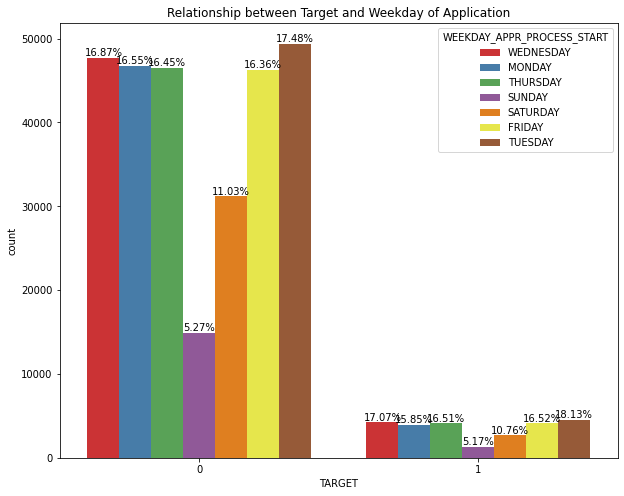

In [24]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='WEEKDAY_APPR_PROCESS_START', palette='Set1')
plt.title('Relationship between Target and Weekday of Application')
target = [0,1,0,1,0,1,0,1,0,1,0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Organization Type

In [120]:
data['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [121]:
# There's a lot of xna here so I'm just gonna set it as nan
data['ORGANIZATION_TYPE'] = data['ORGANIZATION_TYPE'].replace('XNA', np.nan)

In [124]:
# Group the data by ORGANIZATION_TYPE and TARGET, then count the occurrences
organization_counts = data.groupby(['ORGANIZATION_TYPE', 'TARGET']).size().unstack(fill_value=0)

In [125]:
# Reset the index and rename the columns
organization_counts = organization_counts.reset_index()
organization_counts.columns = ['ORGANIZATION_TYPE', 'TARGET_0', 'TARGET_1']

In [126]:
organization_counts

,ORGANIZATION_TYPE,TARGET_0,TARGET_1
0,Advertising,394,35
1,Agriculture,2197,257
2,Bank,2377,130
3,Business Entity Type 1,5497,487
4,Business Entity Type 2,9653,900
5,Business Entity Type 3,61669,6323
6,Cleaning,231,29
7,Construction,5936,785
8,Culture,358,21
9,Electricity,887,63


In [127]:
total_organizations = organization_counts['TARGET_0'] + organization_counts['TARGET_1']
organization_counts['0 Percentage'] = (organization_counts['TARGET_0'] / total_organizations) * 100
organization_counts['1 Percentage'] = (organization_counts['TARGET_1'] / total_organizations) * 100

In [128]:
organization_counts

,ORGANIZATION_TYPE,TARGET_0,TARGET_1,0 Percentage,1 Percentage
0,Advertising,394,35,91.841492,8.158508
1,Agriculture,2197,257,89.527302,10.472698
2,Bank,2377,130,94.814519,5.185481
3,Business Entity Type 1,5497,487,91.861631,8.138369
4,Business Entity Type 2,9653,900,91.471619,8.528381
5,Business Entity Type 3,61669,6323,90.700377,9.299623
6,Cleaning,231,29,88.846154,11.153846
7,Construction,5936,785,88.320190,11.679810
8,Culture,358,21,94.459103,5.540897
9,Electricity,887,63,93.368421,6.631579


### Building Info

In [129]:
data['FONDKAPREMONT_MODE'].value_counts()

FONDKAPREMONT_MODE
reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: count, dtype: int64

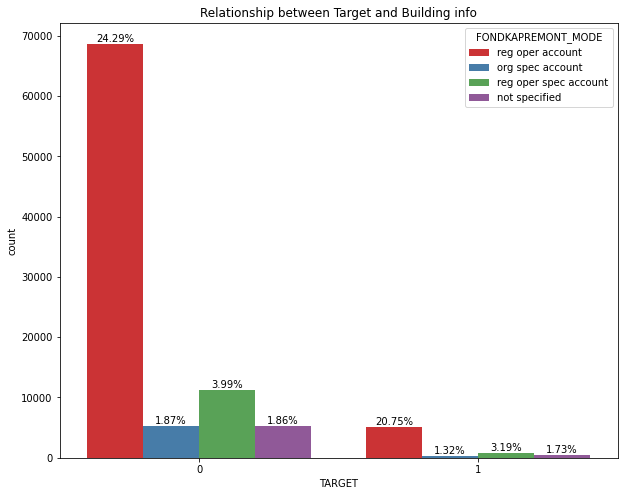

In [25]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='FONDKAPREMONT_MODE', palette='Set1')
plt.title('Relationship between Target and Building info')
target = [0,1,0,1,0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### House Type

In [134]:
data['HOUSETYPE_MODE'].value_counts(dropna=False)

HOUSETYPE_MODE
NaN                 154297
block of flats      150503
specific housing      1499
terraced house        1212
Name: count, dtype: int64

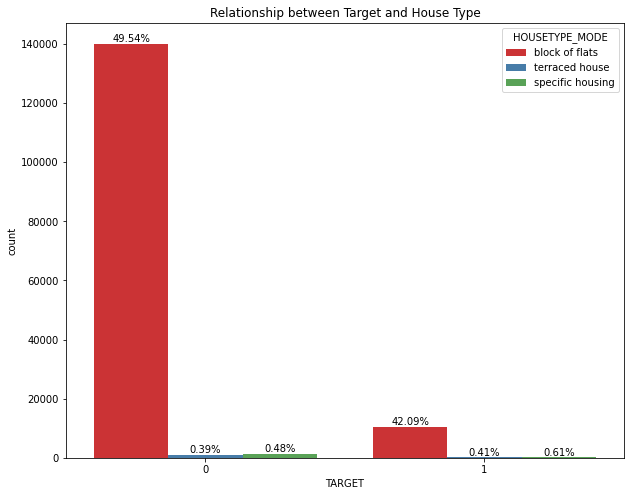

In [26]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='HOUSETYPE_MODE', palette='Set1')
plt.title('Relationship between Target and House Type')
target = [0,1,0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Walls Material

In [135]:
data['WALLSMATERIAL_MODE'].value_counts(dropna=False)

WALLSMATERIAL_MODE
NaN             156341
Panel            66040
Stone, brick     64815
Block             9253
Wooden            5362
Mixed             2296
Monolithic        1779
Others            1625
Name: count, dtype: int64

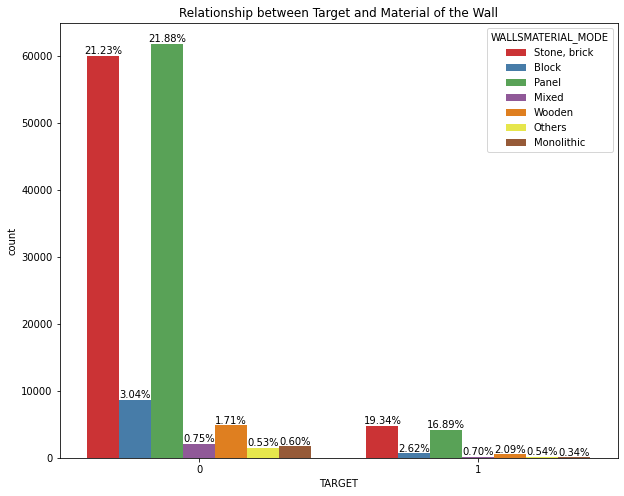

In [27]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='WALLSMATERIAL_MODE', palette='Set1')
plt.title('Relationship between Target and Material of the Wall')
target = [0,1,0,1,0,1,0,1,0,1,0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

### Emergency State

In [137]:
data['EMERGENCYSTATE_MODE'].value_counts(dropna=False)

EMERGENCYSTATE_MODE
No     159428
NaN    145755
Yes      2328
Name: count, dtype: int64

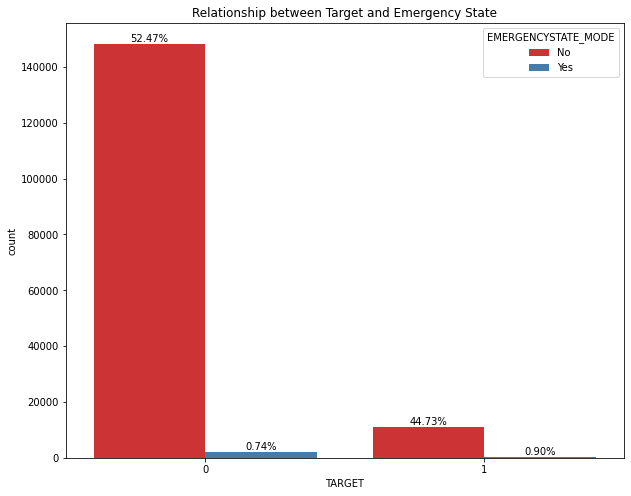

In [28]:
# Create a grouped bar plot
plt.figure(figsize = (10, 8))
ax = sns.countplot(data=data, x='TARGET', hue='EMERGENCYSTATE_MODE', palette='Set1')
plt.title('Relationship between Target and Emergency State')
target = [0,1,0,1]
i=0
# Add percentages on the bars
for p in ax.patches:
    height = p.get_height()
    if p.get_height() > 0:
        percentage = 100 * (p.get_height() / len(data[data['TARGET'] == target[i]]))
        i+=1
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()

## Assessing Numerical Features

In [31]:
numeric_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]

In [32]:
numeric_columns.remove('TARGET')
numeric_columns.remove('SK_ID_CURR')

In [21]:
len(numeric_columns)

104

In [26]:
for col in numeric_columns:
    print(col,len(data[col].value_counts()))

CNT_CHILDREN 15
AMT_INCOME_TOTAL 2548
AMT_CREDIT 5603
AMT_ANNUITY 13672
AMT_GOODS_PRICE 1002
REGION_POPULATION_RELATIVE 81
DAYS_BIRTH 17460
DAYS_EMPLOYED 12574
DAYS_REGISTRATION 15688
DAYS_ID_PUBLISH 6168
OWN_CAR_AGE 62
FLAG_MOBIL 2
FLAG_EMP_PHONE 2
FLAG_WORK_PHONE 2
FLAG_CONT_MOBILE 2
FLAG_PHONE 2
FLAG_EMAIL 2
CNT_FAM_MEMBERS 17
REGION_RATING_CLIENT 3
REGION_RATING_CLIENT_W_CITY 3
HOUR_APPR_PROCESS_START 24
REG_REGION_NOT_LIVE_REGION 2
REG_REGION_NOT_WORK_REGION 2
LIVE_REGION_NOT_WORK_REGION 2
REG_CITY_NOT_LIVE_CITY 2
REG_CITY_NOT_WORK_CITY 2
LIVE_CITY_NOT_WORK_CITY 2
EXT_SOURCE_1 114584
EXT_SOURCE_2 119831
EXT_SOURCE_3 814
APARTMENTS_AVG 2339
BASEMENTAREA_AVG 3780
YEARS_BEGINEXPLUATATION_AVG 285
YEARS_BUILD_AVG 149
COMMONAREA_AVG 3181
ELEVATORS_AVG 257
ENTRANCES_AVG 285
FLOORSMAX_AVG 403
FLOORSMIN_AVG 305
LANDAREA_AVG 3527
LIVINGAPARTMENTS_AVG 1868
LIVINGAREA_AVG 5199
NONLIVINGAPARTMENTS_AVG 386
NONLIVINGAREA_AVG 3290
APARTMENTS_MODE 760
BASEMENTAREA_MODE 3841
YEARS_BEGINEXPLUATATION

### Finding correlations with target

In [35]:
# Find correlations with the target and sort
correlations = data[numeric_columns].corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.074958
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


### Age

In [36]:
data['DAYS_BIRTH'].describe()
# The age is negative for some reason, the correlation is positive, this means that as the client 
# gets older they tend to repay on time more often (target = 0)

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [37]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].abs()

In [38]:
(data['DAYS_BIRTH']/365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

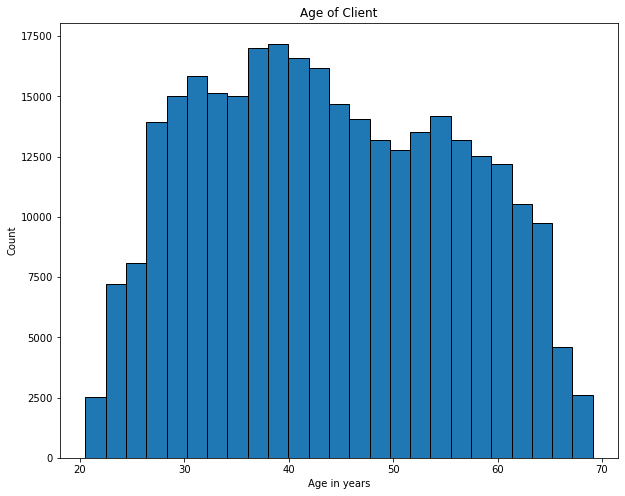

In [41]:
# Plot the distribution of ages in years
plt.figure(figsize = (10, 8))
plt.hist(data['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age in years')
plt.ylabel('Count');

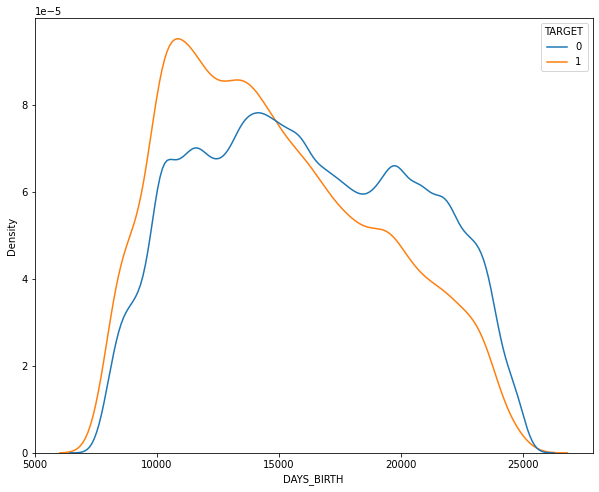

In [7]:
plt.figure(figsize = (10, 8))
sns.kdeplot(data=data, x='DAYS_BIRTH', hue='TARGET', common_norm=False)
plt.show()

In [8]:
# Age information into a separate dataframe
age_data = data[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['bins'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

<ipython-input-8-392a22fd985d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
<ipython-input-8-392a22fd985d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['bins'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,bins
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [9]:
age_groups = age_data.groupby('bins').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
bins,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


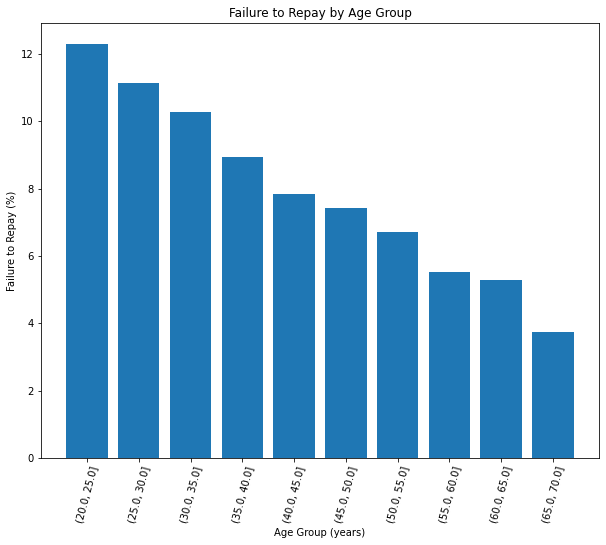

In [10]:
plt.figure(figsize = (10,8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

### External Sources Scores 

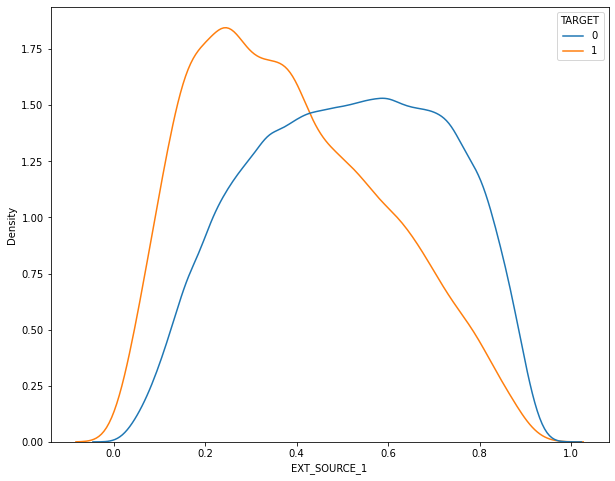

In [12]:
plt.figure(figsize = (10, 8))
sns.kdeplot(data=data, x='EXT_SOURCE_1', hue='TARGET', common_norm=False)
plt.show()

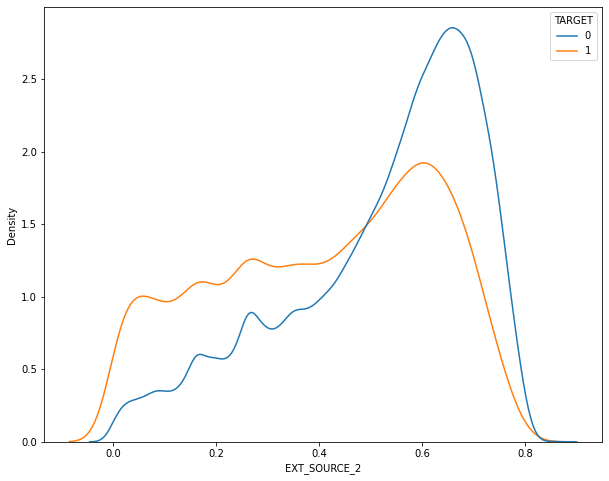

In [13]:
plt.figure(figsize = (10, 8))
sns.kdeplot(data=data, x='EXT_SOURCE_2', hue='TARGET', common_norm=False)
plt.show()

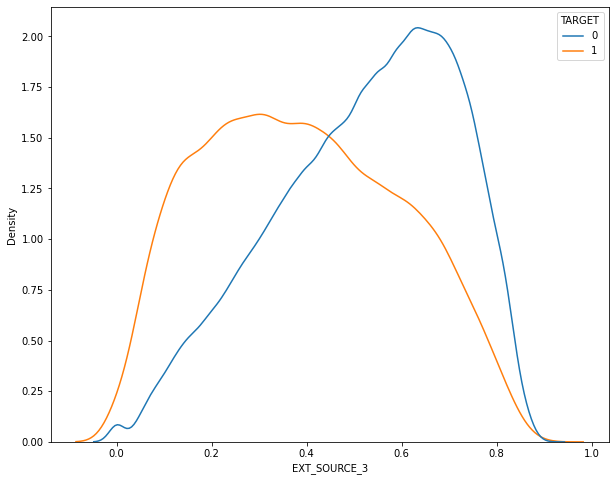

In [14]:
plt.figure(figsize = (10, 8))
sns.kdeplot(data=data, x='EXT_SOURCE_3', hue='TARGET', common_norm=False)
plt.show()

### Days Employed

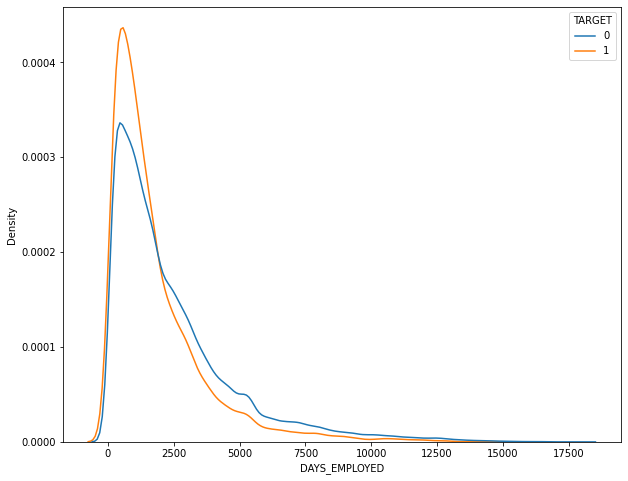

In [105]:
plt.figure(figsize = (10, 8))
sns.kdeplot(data=data, x='DAYS_EMPLOYED', hue='TARGET', common_norm=False)
plt.show()

### Checking for Outliers

In [35]:
out = {'ColumnName':[],'num_outliers':[],'per_outliers':[]}
out = df = pd.DataFrame(out)

In [36]:
for col in numeric_columns:
    if len(data[col].value_counts()) > 3:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify the outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Count the number of outliers
        num_outliers = len(outliers)
        per_outliers = num_outliers/len(data)*100
        out.loc[len(out)] = {'ColumnName': col,'num_outliers': num_outliers, 'per_outliers': per_outliers}

In [37]:
out.sort_values('per_outliers', ascending=False).head(20)

,ColumnName,num_outliers,per_outliers
68,AMT_REQ_CREDIT_BUREAU_QRT,50575,16.446566
67,AMT_REQ_CREDIT_BUREAU_MON,43759,14.230060
60,DEF_30_CNT_SOCIAL_CIRCLE,35166,11.435688
62,DEF_60_CNT_SOCIAL_CIRCLE,25769,8.379863
59,OBS_30_CNT_SOCIAL_CIRCLE,19971,6.494402
61,OBS_60_CNT_SOCIAL_CIRCLE,19564,6.362049
43,NONLIVINGAREA_MODE,18817,6.119131
57,NONLIVINGAREA_MEDI,17254,5.610856
29,NONLIVINGAREA_AVG,16546,5.380621
28,NONLIVINGAPARTMENTS_AVG,15580,5.066485


In [29]:
data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [30]:
len(data[data['DAYS_EMPLOYED']<0])

252135

In [31]:
data[data['DAYS_EMPLOYED']>0]['DAYS_EMPLOYED']

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

In [34]:
# It seems to be the DAYS_EMPLOYED is either negative or 365243 days (which is more than 1000 years)
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [39]:
out[out['ColumnName'] == 'DAYS_EMPLOYED']

,ColumnName,num_outliers,per_outliers
7,DAYS_EMPLOYED,15149,4.926328


In [40]:
data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [58]:
data[data['AMT_REQ_CREDIT_BUREAU_MON']>15]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2847,103323,0,Cash loans,M,N,Y,0,270000.0,630000.0,20322.0,...,0,0,0,0,0.0,0.0,0.0,16.0,0.0,2.0
3369,103936,0,Cash loans,F,N,Y,0,153000.0,760225.5,51138.0,...,0,0,0,0,0.0,0.0,0.0,16.0,0.0,0.0
6028,107056,0,Cash loans,M,N,Y,0,225000.0,1029681.0,30235.5,...,0,0,0,0,0.0,0.0,1.0,16.0,0.0,3.0
11579,113492,0,Cash loans,M,N,Y,0,202500.0,405000.0,21204.0,...,0,0,0,0,0.0,0.0,0.0,16.0,0.0,1.0
12435,114495,0,Cash loans,F,N,N,0,117450.0,497520.0,33246.0,...,0,0,0,0,1.0,0.0,0.0,17.0,0.0,0.0
12869,114999,0,Cash loans,M,Y,Y,0,180000.0,1258681.5,36931.5,...,0,0,0,0,0.0,0.0,0.0,24.0,2.0,2.0
15268,117827,0,Cash loans,M,Y,N,0,360000.0,1575000.0,41548.5,...,0,0,0,0,0.0,0.0,0.0,16.0,0.0,1.0
15854,118500,0,Revolving loans,M,N,Y,0,225000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,16.0,0.0,1.0
18410,121473,0,Cash loans,F,N,N,0,234000.0,1506816.0,49797.0,...,0,0,0,0,0.0,0.0,0.0,16.0,0.0,0.0
20320,123710,0,Cash loans,M,Y,Y,0,315000.0,1183963.5,38322.0,...,0,0,0,0,0.0,0.0,0.0,16.0,0.0,2.0


In [41]:
data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [62]:
data[data['AMT_REQ_CREDIT_BUREAU_QRT']>10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
239474,377322,0,Cash loans,F,N,Y,1,360000.0,1035000.0,30393.0,...,0,0,0,0,0.0,0.0,0.0,1.0,261.0,0.0
253541,393383,1,Cash loans,F,N,Y,1,202500.0,675000.0,34596.0,...,0,0,0,0,0.0,0.0,0.0,0.0,19.0,2.0


### Checking missing values

In [9]:
mis_val = data.isnull().sum()
mis_val_per = data.isnull().sum()/len(data)
mis_val_table = pd.concat([mis_val, mis_val_per], axis=1)

In [10]:
mis_val_table

,0,1
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016


In [11]:
mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'}, inplace=True)

In [12]:
mis_val_table.reset_index(inplace=True)

In [13]:
mis_val_table.sort_values('% of Total Values', ascending=False).head(20)

,index,Missing Values,% of Total Values
76,COMMONAREA_MEDI,214865,0.698723
48,COMMONAREA_AVG,214865,0.698723
62,COMMONAREA_MODE,214865,0.698723
70,NONLIVINGAPARTMENTS_MODE,213514,0.694330
56,NONLIVINGAPARTMENTS_AVG,213514,0.694330
84,NONLIVINGAPARTMENTS_MEDI,213514,0.694330
86,FONDKAPREMONT_MODE,210295,0.683862
68,LIVINGAPARTMENTS_MODE,210199,0.683550
54,LIVINGAPARTMENTS_AVG,210199,0.683550
82,LIVINGAPARTMENTS_MEDI,210199,0.683550


In [14]:
mis_val_table[mis_val_table['% of Total Values'] > 0]

,index,Missing Values,% of Total Values
9,AMT_ANNUITY,12,0.000039
10,AMT_GOODS_PRICE,278,0.000904
11,NAME_TYPE_SUITE,1292,0.004201
21,OWN_CAR_AGE,202929,0.659908
28,OCCUPATION_TYPE,96391,0.313455
...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
119,AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016


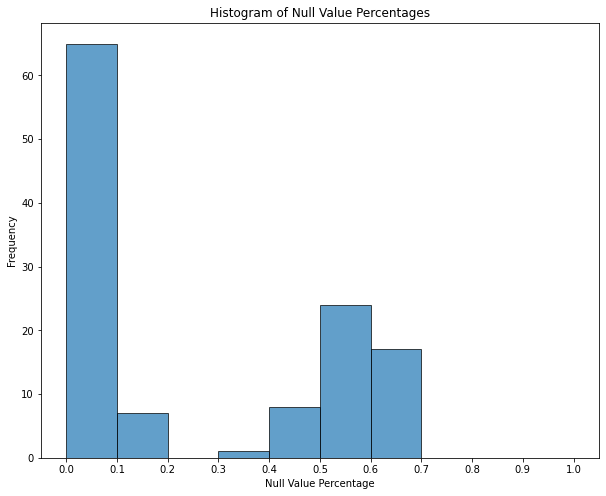

In [42]:
bins = [0] + [i / 10 for i in range(1, 11)]  
plt.figure(figsize = (10, 8))
plt.hist(mis_val_table['% of Total Values'], bins=bins, edgecolor='k', alpha=0.7)
plt.xlabel('Null Value Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Null Value Percentages')
plt.xticks(bins)
plt.show()